In [1]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    import imp

In [2]:
import NeuralNetwork as nn
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
import random

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-

# Data

In [4]:
data = np.genfromtxt("data/train_small.csv", delimiter=",", skip_header=1, dtype=float)
# data = data[:50]
# data = np.genfromtxt("data/generated_dataset.csv", delimiter=",", skip_header=1, dtype=float)
print(data.shape)

(999, 785)


In [5]:
X = data[:,1:]
Y = data[:,0]

print(X.shape)
print(Y.shape)

(999, 784)
(999,)


### normalize

In [6]:
X /= np.max(X)
print(X.shape)

(999, 784)


### one-hot encoding

In [7]:
Y = Y.astype(dtype=int)
tempY = np.zeros(shape=(len(Y), np.max(Y)+1))
tempY[np.arange(len(Y)),Y] = 1
Y = tempY
print(Y.shape)

(999, 10)


### train/validation split

In [8]:
Xtr, Xva, Ytr, Yva = model_selection.train_test_split(X, Y, train_size=.80, random_state=0)

print(Xtr.shape)
print(Ytr.shape)

(799, 784)
(799, 10)


C:\Users\caojo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Building the model

In [19]:
model = nn.NeuralNetwork(input_length = Xtr.shape[1], lr=0.01, loss=nn.LossFunction.CrossEntropy())
model.add_layer(nn.Layer.FullyConnectedLayer, num_neurons = 32)
model.add_layer(nn.Layer.Relu)
model.add_layer(nn.Layer.FullyConnectedLayer, num_neurons = 10)
model.add_layer(nn.Layer.Softmax)

In [20]:
model.train(Xtr, Ytr, Xva, Yva, epochs=100, batch_size=32)

epoch # 0 :
	Training Accuracy:  0.11389236545682102
	Validation Accuracy:  0.085
	Training loss:  2.299397771084507
	validation loss:  2.345184038780209
epoch # 1 :
	Training Accuracy:  0.13016270337922403
	Validation Accuracy:  0.1
	Training loss:  2.2697432300763287
	validation loss:  2.3092005896007897
epoch # 2 :
	Training Accuracy:  0.13892365456821026
	Validation Accuracy:  0.095
	Training loss:  2.245404497029948
	validation loss:  2.284409036890366
epoch # 3 :
	Training Accuracy:  0.16645807259073842
	Validation Accuracy:  0.12
	Training loss:  2.222116003696036
	validation loss:  2.2618519650979976
epoch # 4 :
	Training Accuracy:  0.19148936170212766
	Validation Accuracy:  0.155
	Training loss:  2.200567114475977
	validation loss:  2.2420032966630643
epoch # 5 :
	Training Accuracy:  0.2165206508135169
	Validation Accuracy:  0.19
	Training loss:  2.1746152585048657
	validation loss:  2.2114749268038465
epoch # 6 :
	Training Accuracy:  0.23529411764705882
	Validation Accuracy: 

	Training Accuracy:  0.7146433041301627
	Validation Accuracy:  0.695
	Training loss:  1.268614768000721
	validation loss:  1.2675971977354237
epoch # 55 :
	Training Accuracy:  0.7121401752190237
	Validation Accuracy:  0.68
	Training loss:  1.2582781874666653
	validation loss:  1.2680123811916033
epoch # 56 :
	Training Accuracy:  0.7246558197747184
	Validation Accuracy:  0.67
	Training loss:  1.2435092723470924
	validation loss:  1.2522862422552934
epoch # 57 :
	Training Accuracy:  0.7058823529411765
	Validation Accuracy:  0.69
	Training loss:  1.2319228120591574
	validation loss:  1.2297770824047252
epoch # 58 :
	Training Accuracy:  0.723404255319149
	Validation Accuracy:  0.725
	Training loss:  1.2187344449993005
	validation loss:  1.2104508469095714
epoch # 59 :
	Training Accuracy:  0.7346683354192741
	Validation Accuracy:  0.7
	Training loss:  1.208444370857432
	validation loss:  1.2002674638992448
epoch # 60 :
	Training Accuracy:  0.7296620775969962
	Validation Accuracy:  0.715
	Tr

In [11]:
predict_va = model.predict(Xva)

Predicting 9 with 0.23486921237843783 confidence


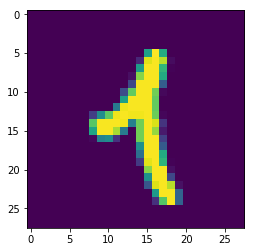

In [12]:
num = random.randint(0, len(Xva))
plt.imshow(np.reshape(Xva[num], (28,28)))
p = predict_va[num]
max_index = np.argmax(p)
print ("Predicting", max_index, "with", p[max_index], "confidence")

# Tensorflow Comparison

In [13]:
tf_model = tf.keras.models.Sequential()

def create_dense(n):
    return tf.keras.layers.Dense(n,
                use_bias = False)
#                 activation='relu',
#                 kernel_initializer=tf.ones_initializer())
#               kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1))

tf_model.add(tf.keras.layers.Dense(32, activation='relu'))
tf_model.add(tf.keras.layers.Dense(10, activation='softmax'))
# tf_model.add(tf.keras.layers.Softmax())

tf_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
                 loss = tf.keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

In [14]:
tf_model.fit(Xtr, Ytr, validation_data=(Xva, Yva), epochs = 100, batch_size = 32)

Train on 799 samples, validate on 200 samples
Epoch 1/100
799/799 [==============================] - 2s 3ms/step - loss: 2.3068 - acc: 0.1289 - val_loss: 2.1881 - val_acc: 0.2200
Epoch 2/100
799/799 [==============================] - 0s 137us/step - loss: 2.1457 - acc: 0.2553 - val_loss: 2.0468 - val_acc: 0.3750
Epoch 3/100
799/799 [==============================] - 0s 176us/step - loss: 2.0044 - acc: 0.3842 - val_loss: 1.9067 - val_acc: 0.4800
Epoch 4/100
799/799 [==============================] - 0s 159us/step - loss: 1.8719 - acc: 0.4793 - val_loss: 1.7774 - val_acc: 0.5650
Epoch 5/100
799/799 [==============================] - 0s 144us/step - loss: 1.7460 - acc: 0.5457 - val_loss: 1.6481 - val_acc: 0.6250
Epoch 6/100
799/799 [==============================] - ETA: 0s - loss: 1.6243 - acc: 0.609 - 0s 177us/step - loss: 1.6196 - acc: 0.6108 - val_loss: 1.5188 - val_acc: 0.7000
Epoch 7/100
799/799 [==============================] - 0s 182us/step - loss: 1.4955 - acc: 0.6733 - val_loss

Epoch 61/100
799/799 [==============================] - 0s 137us/step - loss: 0.3110 - acc: 0.9399 - val_loss: 0.3718 - val_acc: 0.9050
Epoch 62/100
799/799 [==============================] - 0s 137us/step - loss: 0.3068 - acc: 0.9412 - val_loss: 0.3722 - val_acc: 0.9050
Epoch 63/100
799/799 [==============================] - 0s 133us/step - loss: 0.3036 - acc: 0.9412 - val_loss: 0.3702 - val_acc: 0.9050
Epoch 64/100
799/799 [==============================] - 0s 133us/step - loss: 0.2994 - acc: 0.9437 - val_loss: 0.3657 - val_acc: 0.9050
Epoch 65/100
799/799 [==============================] - 0s 141us/step - loss: 0.2958 - acc: 0.9424 - val_loss: 0.3658 - val_acc: 0.9050
Epoch 66/100
799/799 [==============================] - 0s 141us/step - loss: 0.2928 - acc: 0.9437 - val_loss: 0.3637 - val_acc: 0.9050
Epoch 67/100
799/799 [==============================] - 0s 139us/step - loss: 0.2895 - acc: 0.9412 - val_loss: 0.3619 - val_acc: 0.9050
Epoch 68/100
799/799 [==========================